In [0]:
import pandas as pd

# Ruta del archivo que ya cargaste correctamente
ruta = '/Workspace/Users/javier.perez5739@alumnos.udg.mx/Terrorismo/globalterrorismdb_0718dist.csv'

# Cargar el archivo en una variable llamada df
df = pd.read_csv(ruta, encoding='latin1')

# Verifica que se haya cargado correctamente
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

/home/spark-640c7750-e779-4a75-a3bd-69/.ipykernel/2471/command-6176288770964692-3347186640:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='latin1')


Filas: 181691, Columnas: 135


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [0]:
# Verifica el tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Muestra las primeras filas
df.head()

# Información general de columnas y tipos
df.info()

# Estadísticas básicas
df.describe(include='all')

# Verifica valores nulos
df.isnull().sum().sort_values(ascending=False).head(20)

Filas: 181691, Columnas: 135
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181179
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
dtype: int64

In [0]:
# Eliminar columnas poco útiles
columnas_a_eliminar = ['eventid', 'approxdate', 'related', 'summary', 'scite1', 'scite2', 'scite3']
df = df.drop(columns=columnas_a_eliminar)

# Renombrar columnas clave
df = df.rename(columns={
    'iyear': 'year',
    'country_txt': 'country',
    'attacktype1_txt': 'attack_type'
})

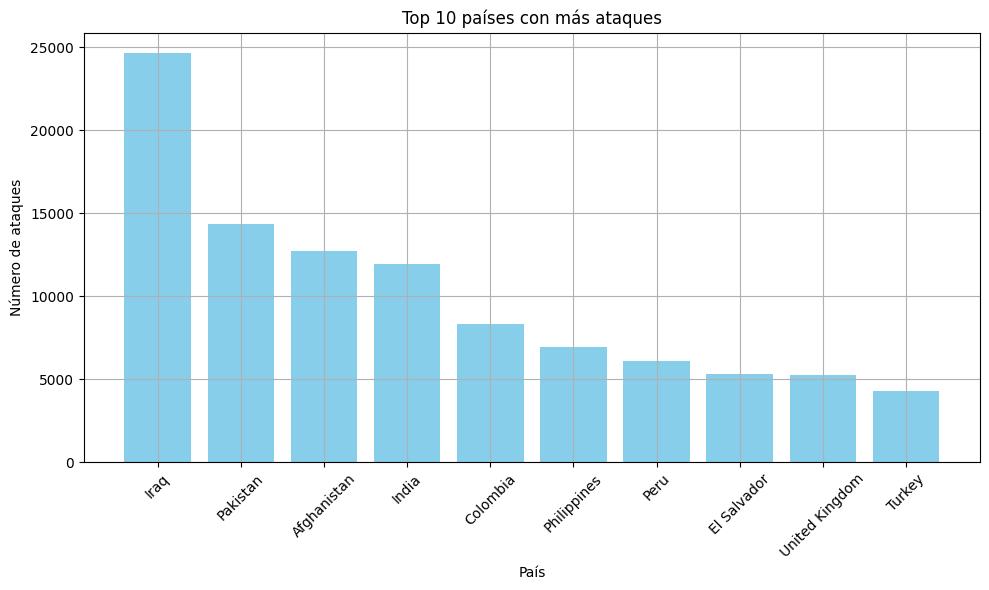

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

conteo_paises = df.groupby('country_txt').size().sort_values(ascending=False).head(10)

# Preparar datos para graficar
labels = conteo_paises.index.tolist()
values = conteo_paises.values.tolist()

# Graficar
plt.figure(figsize=(10,6))
plt.bar(labels, values, color='skyblue')
plt.title('Top 10 países con más ataques')
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

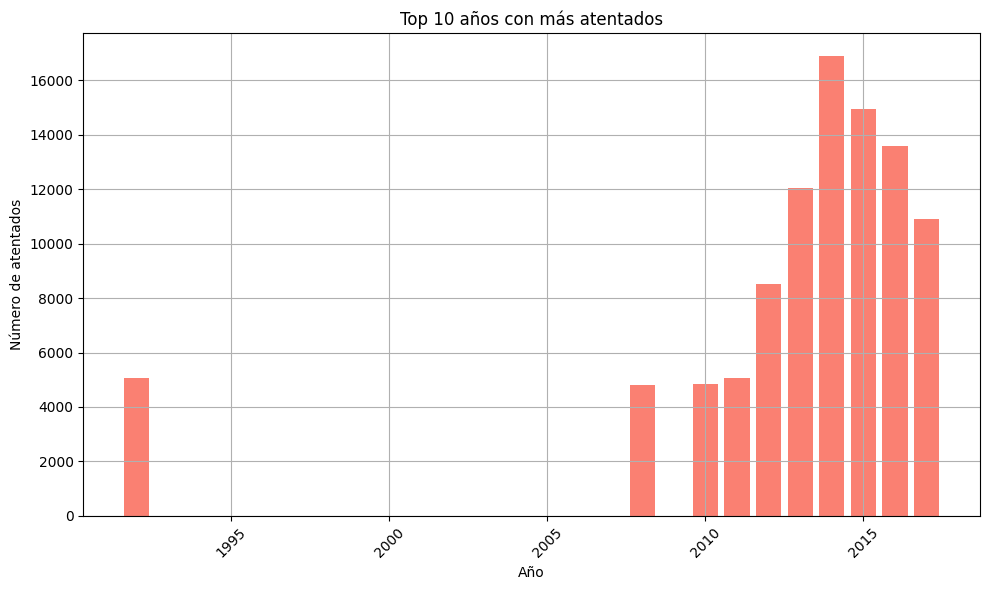

In [0]:
# Agrupar y contar atentados por año
conteo_anual = df.groupby('iyear').size().sort_values(ascending=False).head(10)

# Preparar datos para graficar
etiquetas = conteo_anual.index.tolist()  # años
valores = conteo_anual.values.tolist()   # número de atentados

# Graficar
plt.figure(figsize=(10,6))
plt.bar(etiquetas, valores, color='salmon')
plt.title('Top 10 años con más atentados')
plt.xlabel('Año')
plt.ylabel('Número de atentados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [0]:
import plotly.graph_objects as go

# Agrupar por país y año
grupo = df.groupby(['country_txt', 'iyear']).size().reset_index(name='num_atentados')

# Seleccionar los 10 países con más atentados totales
top_paises = grupo.groupby('country_txt')['num_atentados'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filtrar solo esos países
grupo_filtrado = grupo[grupo['country_txt'].isin(top_paises)]

# Crear gráfica 3D interactiva
fig = go.Figure(data=[go.Scatter3d(
    x=grupo_filtrado['country_txt'],
    y=grupo_filtrado['num_atentados'],
    z=grupo_filtrado['iyear'],
    mode='markers',
    marker=dict(
        size=5,
        color=grupo_filtrado['num_atentados'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='Atentados por país y año',
    scene=dict(
        xaxis_title='País',
        yaxis_title='Número de atentados',
        zaxis_title='Año'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

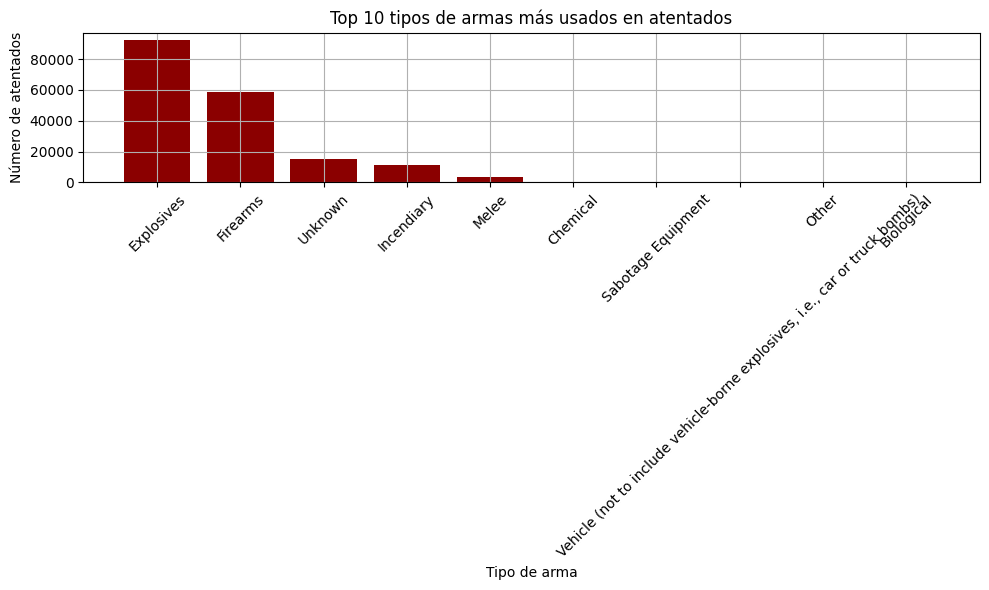

In [0]:

# Agrupar y contar por tipo de arma
conteo_armas = df.groupby('weaptype1_txt').size().sort_values(ascending=False).head(10)

# Preparar datos para graficar
etiquetas = conteo_armas.index.tolist()
valores = conteo_armas.values.tolist()

# Graficar
plt.figure(figsize=(10,6))
plt.bar(etiquetas, valores, color='darkred')
plt.title('Top 10 tipos de armas más usados en atentados')
plt.xlabel('Tipo de arma')
plt.ylabel('Número de atentados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [0]:
import pyspark.pandas as ps

# Convertir el DataFrame de pandas a Koalas
df_koalas = ps.from_pandas(df)

In [0]:
df_filtrado = df_koalas[df_koalas['iyear'] >= 2000]

In [0]:
df_filtrado['severidad'] = df_filtrado['nkill'].apply(
    lambda x: 'Alta' if x >= 10 else ('Media' if x >= 3 else 'Baja')
)

In [0]:
ataques_por_tipo = df_filtrado.groupby('attacktype1_txt').size().sort_values(ascending=False)

In [0]:
ataques_por_pais_anio = df_filtrado.groupby(['country_txt', 'iyear']).size().reset_index(name='num_atentados')

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning:

`to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning:

`to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.



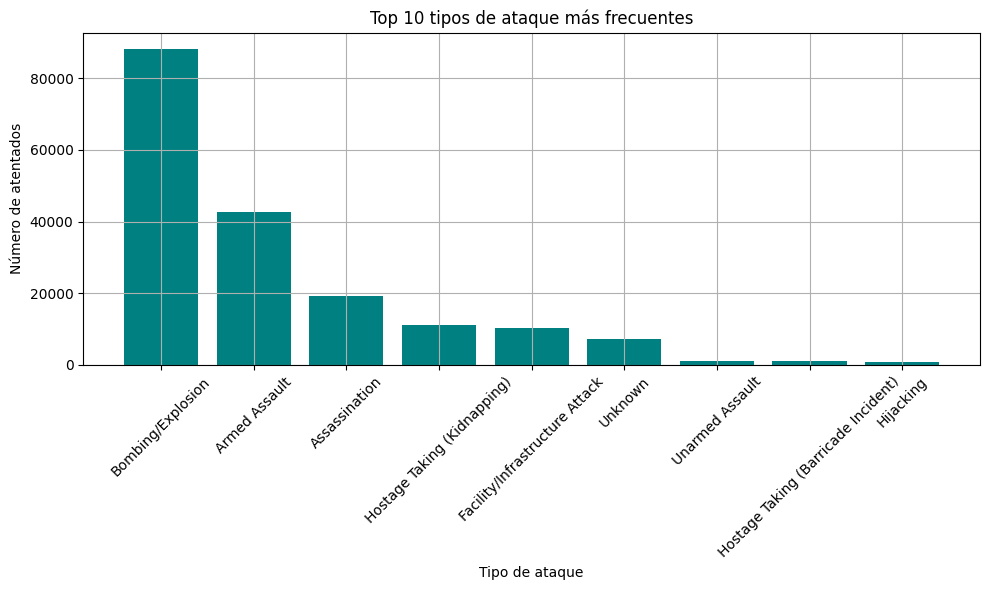

In [0]:
# Agrupar y contar por tipo de ataque
ataques_por_tipo = df_koalas.groupby('attacktype1_txt').size().sort_values(ascending=False).head(10)

# Preparar datos
etiquetas = ataques_por_tipo.index.tolist()
valores = ataques_por_tipo.tolist()

# Graficar
plt.figure(figsize=(10,6))
plt.bar(etiquetas, valores, color='teal')
plt.title('Top 10 tipos de ataque más frecuentes')
plt.xlabel('Tipo de ataque')
plt.ylabel('Número de atentados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning:

`to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning:

`to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.



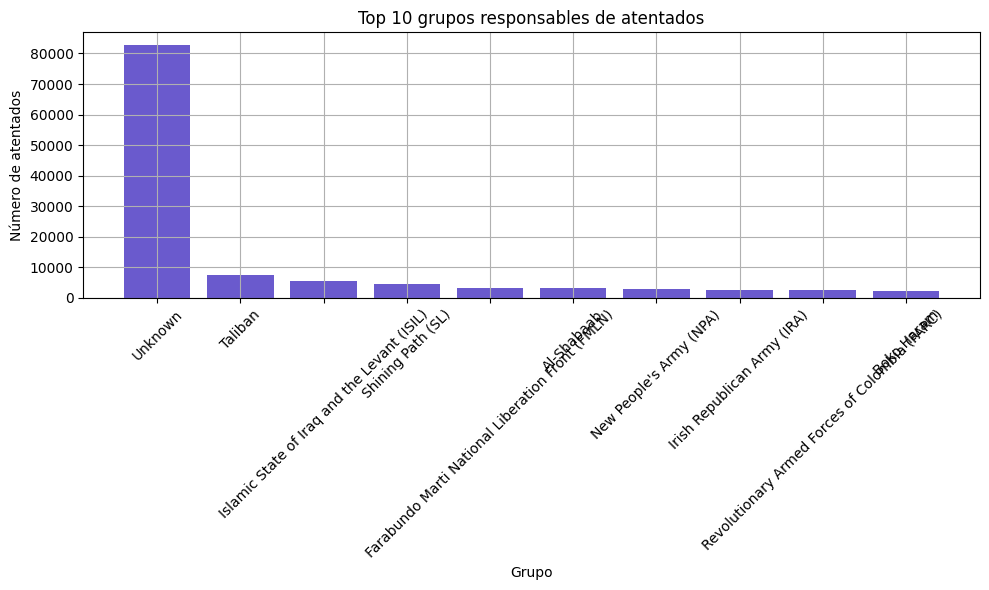

In [0]:
# Agrupar y contar por grupo responsable
grupos_por_frecuencia = df_koalas.groupby('gname').size().sort_values(ascending=False).head(10)

# Preparar datos
etiquetas = grupos_por_frecuencia.index.tolist()
valores = grupos_por_frecuencia.tolist()

# Graficar
plt.figure(figsize=(10,6))
plt.bar(etiquetas, valores, color='slateblue')
plt.title('Top 10 grupos responsables de atentados')
plt.xlabel('Grupo')
plt.ylabel('Número de atentados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualización básica con Koalas + Matplotlib

En esta sección se presentan tres visualizaciones clave utilizando la API "pyspark.pandas" (Koalas) junto con "matplotlib", enfocadas en el análisis exploratorio de la base de datos Global Terrorism Database.

### 1. Tipos de ataque más frecuentes

Se agruparon los datos por la columna "attacktype1_txt", que describe el tipo de ataque (por ejemplo, atentado suicida, asalto armado, toma de rehenes). Se seleccionaron los 10 tipos más comunes y se representaron en un gráfico de barras. Esta visualización permite identificar los métodos más utilizados en actos terroristas.

### 2. Tipos de armas más utilizadas

Se utilizó la columna "weaptype1_txt" para agrupar los datos por tipo de arma. El gráfico muestra las 10 categorías más frecuentes, como explosivos, armas de fuego, incendiarias, entre otras. Esta visualización ayuda a entender los recursos bélicos más empleados por los grupos responsables.

### 3. Grupos responsables con mayor número de atentados

Se agruparon los datos por la columna "game", que identifica el grupo responsable del atentado. Se graficaron los 10 grupos con mayor número de incidentes registrados. Esta visualización permite reconocer los actores más activos dentro del conjunto de datos.

Todas las visualizaciones fueron generadas utilizando "df_koalas", asegurando el uso adecuado de la API Koalas en un entorno Spark, tal como lo exige el challenge. Las gráficas fueron personalizadas para mejorar la legibilidad, incluyendo etiquetas, colores temáticos y rotación de texto.
